In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [ ]:
#there is no need to drop any column or row there is no null values
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
#we need to remove price column to be the last column
columns= df.columns.tolist()
columns

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [ ]:
columns.append(columns.pop(0))
columns

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus',
 'price']

In [ ]:
df=df[columns]
df.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000


In [ ]:
#check for the datatypes
pd.DataFrame([df.nunique(),df.dtypes],index=["num_nique","data_type"])

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
num_nique,284,6,4,4,2,2,2,2,2,4,2,3,219
data_type,int64,int64,int64,int64,object,object,object,object,object,int64,object,object,int64


In [ ]:
#change some datatypes to category
colo=["mainroad","guestroom","basement","hotwaterheating"	,"airconditioning","prefarea","parking","furnishingstatus"]
df[colo]=df[colo].astype("category")


In [ ]:
df.dtypes

area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking             category
prefarea            category
furnishingstatus    category
price                  int64
dtype: object

In [ ]:
#check for duplicated
df.duplicated().sum()

0

In [ ]:
# stats about numeric data
df.describe()

,area,bedrooms,bathrooms,stories,price
count,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,1.330000e+07


In [ ]:
# stats about categorical data
df.describe(include=["category", "object"])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545,545,545,545,545,545,545,545
unique,2,2,2,2,2,4,2,3
top,yes,no,no,no,no,0,no,semi-furnished
freq,468,448,354,520,373,299,417,227


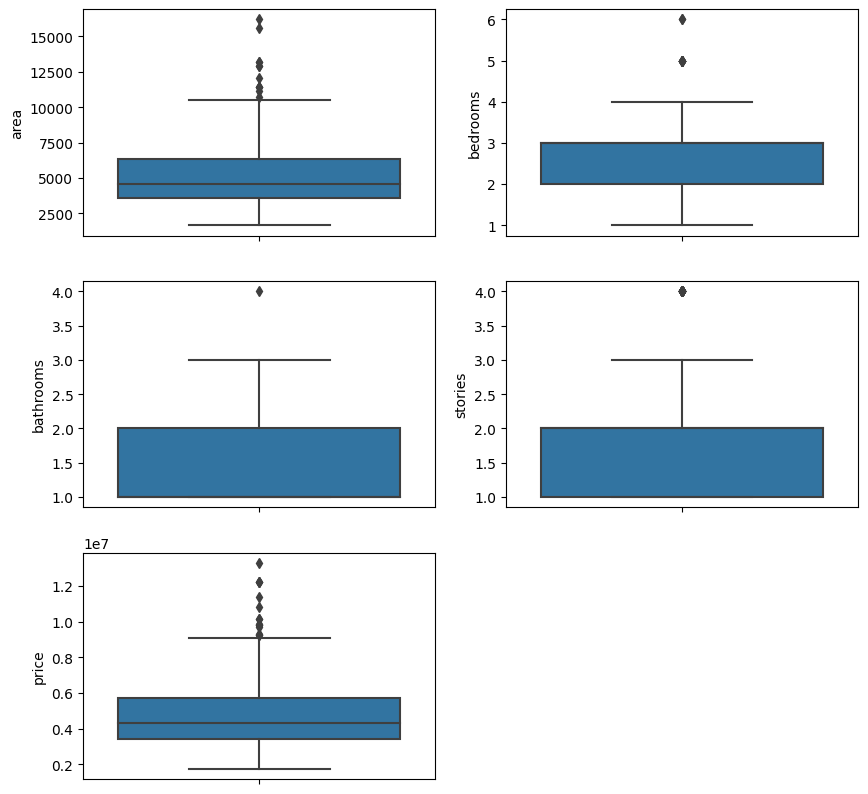

In [ ]:
#checking for outliers
# using BoxPlot

plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
sns.boxplot(y="area", data=df)

plt.subplot(3, 2, 2)
sns.boxplot(y="bedrooms", data=df)

plt.subplot(3, 2, 3)
sns.boxplot(y="bathrooms", data=df)

plt.subplot(3, 2, 4)
sns.boxplot(y="stories", data=df)

plt.subplot(3, 2, 5)
sns.boxplot(y="price", data=df)
plt.show()
#based on the figure there is no need to drop any value

In [ ]:
# do some visualisation

In [ ]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1820000
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1767150
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1750000
543,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000


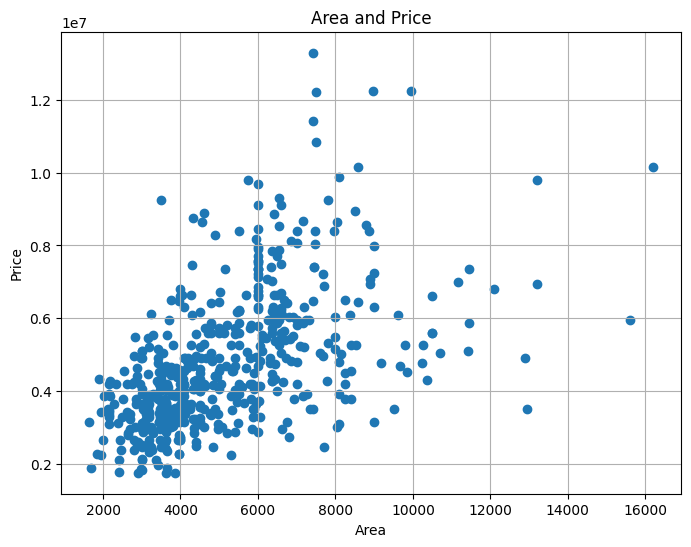

In [ ]:

#relation between area an price

plt.figure(figsize=(8, 6))

plt.scatter(df['area'], df['price'])
plt.title('Area and Price')
plt.xlabel('Area')
plt.ylabel('Price')

plt.grid(True)
plt.show()

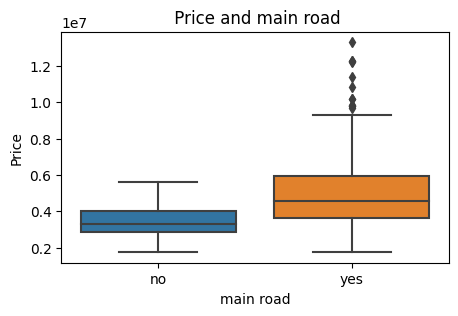

In [ ]:
#relarion between price and main road
plt.figure(figsize=(5, 3))
sns.boxplot(x='mainroad', y='price', data=df)
plt.title(' Price and main road')
plt.xlabel('main road')
plt.ylabel('Price')
plt.show()

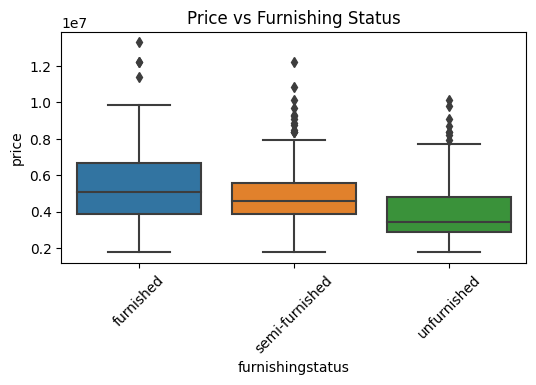

In [ ]:
#relation between price and furnishing status
plt.figure(figsize=(6, 3))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Price vs Furnishing Status')
plt.xticks(rotation=45)
plt.show()


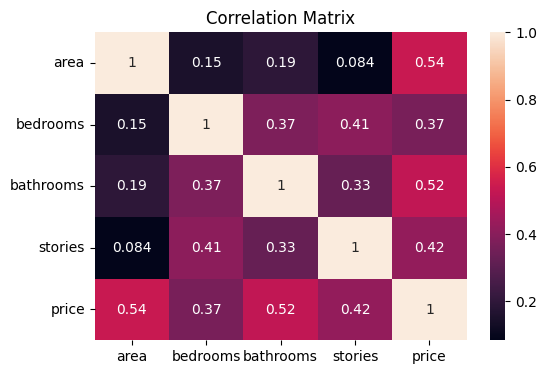

In [ ]:

plt.figure(figsize=(6, 4))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.dtypes

area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking             category
prefarea            category
furnishingstatus    category
price                  int64
dtype: object

In [ ]:
#normalization values of numeric columns to values between 0&1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df.area=scaler.fit_transform(df[["area"]])

In [ ]:
df.bedrooms=scaler.fit_transform(df[["bedrooms"]])

In [ ]:
df.bathrooms=scaler.fit_transform(df[["bathrooms"]])

In [ ]:
df.stories=scaler.fit_transform(df[["stories"]])

In [ ]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,2,yes,furnished,13300000
1,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,3,no,furnished,12250000
2,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,3,yes,furnished,12215000
4,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,2,no,furnished,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,yes,no,yes,no,no,2,no,unfurnished,1820000
541,0.051546,0.4,0.000000,0.000000,no,no,no,no,no,0,no,semi-furnished,1767150
542,0.135395,0.2,0.000000,0.000000,yes,no,no,no,no,0,no,unfurnished,1750000
543,0.086598,0.4,0.000000,0.000000,no,no,no,no,no,0,no,furnished,1750000


In [ ]:
#label encoding for mainroad	guestroom	basement	hotwaterheating	airconditioning	prefarea
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.mainroad=le.fit_transform(df.mainroad)


In [ ]:
df.guestroom=le.fit_transform(df.guestroom)

In [ ]:
df.basement=le.fit_transform(df.basement)

In [ ]:
df.hotwaterheating=le.fit_transform(df.hotwaterheating)

In [ ]:
df.airconditioning=le.fit_transform(df.airconditioning)

In [ ]:
df.prefarea=le.fit_transform(df.prefarea)

In [ ]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,2,1,furnished,13300000
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,3,0,furnished,12250000
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,2,1,semi-furnished,12250000
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,3,1,furnished,12215000
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,2,0,furnished,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,2,0,unfurnished,1820000
541,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0,0,semi-furnished,1767150
542,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0,0,unfurnished,1750000
543,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0,0,furnished,1750000


In [ ]:
#one hot encoding for parking ,furnishingstatus coloumns
df=pd.get_dummies(df,columns=["parking"])


In [ ]:
df=pd.get_dummies(df,columns=["furnishingstatus"])


In [ ]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,price,parking_0,parking_1,parking_2,parking_3,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,1,13300000,0,0,1,0,1,0,0
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,0,12250000,0,0,0,1,1,0,0
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,1,12250000,0,0,1,0,0,1,0
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1,12215000,0,0,0,1,1,0,0
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0,11410000,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,0,1820000,0,0,1,0,0,0,1
541,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0,1767150,1,0,0,0,0,1,0
542,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0,1750000,1,0,0,0,0,0,1
543,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0,1750000,1,0,0,0,1,0,0


In [ ]:
df.dtypes

area                               float64
bedrooms                           float64
bathrooms                          float64
stories                            float64
mainroad                             int64
guestroom                            int64
basement                             int64
hotwaterheating                      int64
airconditioning                      int64
prefarea                             int64
price                                int64
parking_0                            uint8
parking_1                            uint8
parking_2                            uint8
parking_3                            uint8
furnishingstatus_furnished           uint8
furnishingstatus_semi-furnished      uint8
furnishingstatus_unfurnished         uint8
dtype: object

In [ ]:
#now the dataset is ready for ml model